In [1]:
import json
import requests
import tweepy
import pandas as pd
import numpy as np
import os 

## Gathering

##### Load provided twitter archive from #WeRateDogs

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

##### Get Images Predictions file

In [3]:
result = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode='wb') as fp:
    fp.write(result.content)

In [4]:
predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')
predictions_df.sample()

tweet_id                                          jpg_url  \
1096  720059472081784833  https://pbs.twimg.com/media/Cf4qRcmWEAA9V4h.jpg   

      img_num                p1   p1_conf  p1_dog       p2   p2_conf  p2_dog  \
1096        1  Mexican_hairless  0.451852    True  redbone  0.254884    True   

                     p3   p3_conf  p3_dog  
1096  Italian_greyhound  0.094818    True

##### Calling Tweeter API

In [5]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# Unfortunately, Twitter Dev portal has not replied to my application

_"We’ve received your application for a Twitter developer account, and we’re starting our review. Case# 0150166583 Twitter developer account application"_

In [6]:
# So, let's use file from Udacity ...
tweets_entries = []
with open('tweet-json-udacity.txt', mode='r', encoding='utf-8') as fd:
    json_string = fd.readline()
    while json_string != "":
        tweet_obj = json.loads(json_string)
        tweets_entries.append(tweet_obj)
        json_string = fd.readline()
api_tweets_df = pd.DataFrame(tweets_entries, columns=list(tweet_obj.keys()))

In [7]:
# Let's see the missing tweets in api file
archive_ids, api_ids = archive_df.tweet_id, api_tweets_df.id
list(set(archive_ids) - set(api_ids))

[771004394259247104, 888202515573088257]

In [8]:
archive_df.query("tweet_id in (771004394259247104, 888202515573088257)")

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19   888202515573088257                    NaN                  NaN   
815  771004394259247104                    NaN                  NaN   

                     timestamp  \
19   2017-07-21 01:02:36 +0000   
815  2016-08-31 15:19:06 +0000   

                                                source  \
19   <a href="http://twitter.com/download/iphone" r...   
815  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
19   RT @dog_rates: This is Canela. She attempted s...         8.874740e+17   
815  RT @katieornah: @dog_rates learning a lot at c...         7.710021e+17   

     retweeted_status_user_id retweeted_status_timestamp  \
19               4.196984e+09  2017-07-19 00:47:34 +0000   
815              1.732729e+09  2016-08-31 15:10:07 +0000   

                                         expanded_urls  rating_numerator  \
19   https://twitter.com/dog_rates/status/887473957...                13   
815  https://twitter.com/katieornah/status/77100213...                12   

     rating_denominator    name doggo floofer  pupper puppo  
19                   10  Canela  None    None    None  None  
815                  10    None  None    None  pupper  None

## Assesment

_Let's assess WeRateDogs enhanced archive_

In [9]:
archive_df.sample(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2090  670786190031921152                    NaN                  NaN   
1176  719991154352222208                    NaN                  NaN   
985   749075273010798592                    NaN                  NaN   

                      timestamp  \
2090  2015-11-29 02:07:44 +0000   
1176  2016-04-12 20:50:42 +0000   
985   2016-07-02 03:00:36 +0000   

                                                 source  \
2090  <a href="http://twitter.com/download/iphone" r...   
1176  <a href="http://twitter.com/download/iphone" r...   
985   <a href="http://vine.co" rel="nofollow">Vine -...   

                                                   text  retweeted_status_id  \
2090  This is Creg. You offered him a ride to work b...                  NaN   
1176  This doggo was initially thrilled when she saw...                  NaN   
985   This is Boomer. He's self-baptizing. Other dog...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2090                       NaN                        NaN   
1176                       NaN                        NaN   
985                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2090  https://twitter.com/dog_rates/status/670786190...                 8   
1176  https://twitter.com/dog_rates/status/719991154...                10   
985                       https://vine.co/v/5ztZvHgI17r                11   

      rating_denominator    name  doggo floofer pupper puppo  
2090                  10    Creg   None    None   None  None  
1176                  10    None  doggo    None   None  None  
985                   10  Boomer  doggo    None   None  None

In [10]:
# Let´s try to find any duplicated entries
archive_df.tweet_id.duplicated().sum()

0

In [11]:
# Calculate how many missing tweet's links there are
archive_df.expanded_urls.isnull().sum()

59

In [12]:
# Visualize if rates correspond to tweet's text
archive_df.describe()[['rating_numerator' ,'rating_denominator']]
#We can see vast majority of numerators are between 10-14 and most of 
#denominators are 10, however there is at least 1 denominator as 0, which is invalid for our purposes

rating_numerator  rating_denominator
count       2356.000000         2356.000000
mean          13.126486           10.455433
std           45.876648            6.745237
min            0.000000            0.000000
25%           10.000000           10.000000
50%           11.000000           10.000000
75%           12.000000           10.000000
max         1776.000000          170.000000

In [13]:
archive_df[archive_df['rating_denominator'] == 0]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640           8.352460e+17           26259576.0   

                     timestamp  \
313  2017-02-24 21:54:03 +0000   

                                                source  \
313  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
313  @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
313                       NaN                        NaN           NaN   

     rating_numerator  rating_denominator  name doggo floofer pupper puppo  
313               960                   0  None  None    None   None  None

In [14]:
# Check values for names
archive_df.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Newt         1
Tiger        1
Gustav       1
Coleman      1
Grizzie      1
Name: name, Length: 957, dtype: int64

In [15]:
# Let´s discover some mistaken names
set(archive_df[archive_df.name.str.islower()]['name'])

{'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

In [16]:
# Clearly there are 745 missing dog names on the data frame, however they 
# are marked as "None".
archive_df.name.isna().sum(), len(archive_df[archive_df.name == "None"])

(0, 745)

In [17]:
# Number of tweets with retweeted_status_id
archive_df.retweeted_status_id.notnull().sum()

181

In [18]:
# Number of tweets without rating
archive_df.rating_numerator.isna().sum() + archive_df.rating_denominator.isna().sum()

0

Assess data quality for tweets extracted from API.

_**Note**: For this data frame, we are only interested on retweet_count, favorite_count, reply_count, quote_count and extended_entities (to get media assets for each tweet)_

In [19]:
api_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [20]:
# No duplicates, that´s good
api_tweets_df.id.duplicated().sum()

0

In [21]:
api_tweets_df.extended_entities

0       {'media': [{'id': 892420639486877696, 'id_str'...
1       {'media': [{'id': 892177413194625024, 'id_str'...
2       {'media': [{'id': 891815175371796480, 'id_str'...
3       {'media': [{'id': 891689552724799489, 'id_str'...
4       {'media': [{'id': 891327551943041024, 'id_str'...
                              ...                        
2349    {'media': [{'id': 666049244999131136, 'id_str'...
2350    {'media': [{'id': 666044217047650304, 'id_str'...
2351    {'media': [{'id': 666033409081393153, 'id_str'...
2352    {'media': [{'id': 666029276303482880, 'id_str'...
2353    {'media': [{'id': 666020881337073664, 'id_str'...
Name: extended_entities, Length: 2354, dtype: object

_Assess data quality for predictions data frame_

In [22]:
predictions_df.sample(3)

tweet_id                                          jpg_url  \
90   667538891197542400  https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg   
294  671355857343524864  https://pbs.twimg.com/media/CVEilyCUwAETbJ-.jpg   
517  676440007570247681  https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg   

     img_num                 p1   p1_conf  p1_dog             p2   p2_conf  \
90         1  Yorkshire_terrier  0.618957    True  silky_terrier  0.300313   
294        1   miniature_poodle  0.313811    True     toy_poodle  0.165585   
517        2        Maltese_dog  0.579472    True     toy_poodle  0.133446   

     p2_dog                  p3   p3_conf  p3_dog  
90     True  Australian_terrier  0.053412    True  
294    True       Irish_terrier  0.056094    True  
517    True            Shih-Tzu  0.094397    True

In [23]:
# Looks like we don´t have any missing data here, however column names look poor descriptive
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# By sampling a little bit, we can see that tag names are sometimes capitalized, sometimes lowercase
predictions_df.sample(3)

tweet_id                                          jpg_url  \
12    666073100786774016  https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
1916  854482394044301312  https://pbs.twimg.com/media/C9u7MtmV0AA741s.jpg   
1244  747461612269887489  https://pbs.twimg.com/media/Cl-EXHSWkAE2IN2.jpg   

      img_num            p1   p1_conf  p1_dog                p2   p2_conf  \
12          1  Walker_hound  0.260857    True  English_foxhound  0.175382   
1916        1     Chihuahua  0.260242    True        toy_poodle  0.189158   
1244        1    binoculars  0.192717   False        barbershop  0.085838   

      p2_dog                  p3   p3_conf  p3_dog  
12      True        Ibizan_hound  0.097471    True  
1916    True  Labrador_retriever  0.144195    True  
1244   False          ballplayer  0.084672   False

In [25]:
# We can see all probability values are valid (any value between 0 and 1)
predictions_df.describe()[['p1_conf', 'p2_conf', 'p3_conf']]

p1_conf       p2_conf       p3_conf
count  2075.000000  2.075000e+03  2.075000e+03
mean      0.594548  1.345886e-01  6.032417e-02
std       0.271174  1.006657e-01  5.090593e-02
min       0.044333  1.011300e-08  1.740170e-10
25%       0.364412  5.388625e-02  1.622240e-02
50%       0.588230  1.181810e-01  4.944380e-02
75%       0.843855  1.955655e-01  9.180755e-02
max       1.000000  4.880140e-01  2.734190e-01

#### Quality
##### `twitter-archive-enhanced` data frame
- Data frame contains some some non original tweets (observations with a non-null `retweeted_status_id`) 
- 59 Missing `expanded_urls` for tweets
- invalid numerator for tweet 883482846933004288, captured value is 5 instead of 13.5
- Invalid denominator zero (tweet 835246439529840640)
- Invaild rate for tweet 666287406224695296, it should be 9/10
- `timestamp` data type is string instead datetime
- Mistaken captured dog names (such as "a", "an", "by" etc ...)
- Standarize "None" values for missing dog names as NaN 

##### `predictions` data frame
- Consistency issue: Standarize tag values by lowercasing all of them.

#### Tidiness

- For simplicity on all data frames, let´s assign `tweet_id` as the index

##### `twitter-archive-enhanced` data frame
- Dog stage should be concentrated in just one column `dog_stage` with categorical value from (doggo, floofer, pupper, puppo, None)
- There should be only 1 data frame with tweet information. Blend tweets from archive and from API into a single dataframe
- Create a column that condenses rating information:  `rating_numerator` / `rating_denominator`

##### `twitter-api` data frame
- Rename `id` as `tweet_id`. This is the standard name used in the rest of datafarmes
- For each tweet, extract `tweet_id` and from `extended_media`, pull out `media_url`, `type` and order in the array. Create a new entry with those values in a `media_assets` data frame. 

##### `predictions` data frame
- Give more friendly name to columns (p1 -> tag1, p1_conf -> tag1_probability, p1_dog tag1_is_dog)


## Cleaning

It is generally best to tackle tidy issues first, then quuality issues next, as it´s easier to clean up dirty data in a well strutured framework. So we are going to start working on Tidiness points above first

In [26]:
archive_df_clean = archive_df.copy()
api_tweets_df_clean = api_tweets_df.copy()
predictions_df_clean = predictions_df.copy()

### Tidiness

##### Define
For api tweets data frame, rename id as `tweet_id`. This is the standard name used in the rest of datafarmes

##### Code

In [27]:
api_tweets_df_clean.rename(columns={'id':'tweet_id'}, inplace=True)

##### Test

In [28]:
assert "tweet_id" in api_tweets_df_clean.columns.to_list()

##### Define

Reindex all dataframes to their `tweet_id` values

##### Code

In [29]:
archive_df_clean.set_index('tweet_id', inplace=True)
api_tweets_df_clean.set_index('tweet_id', inplace=True)
predictions_df_clean.set_index('tweet_id', inplace=True)

##### Test

In [30]:
assert archive_df_clean.index.name == 'tweet_id'
assert archive_df_clean.index.dtype == np.dtype(np.int64)
assert api_tweets_df_clean.index.name == 'tweet_id'
assert api_tweets_df_clean.index.dtype == np.dtype(np.int64)
assert predictions_df_clean.index.name == 'tweet_id'
assert predictions_df_clean.index.dtype == np.dtype(np.int64)

##### Define
Pull out media entries from `extended_media`,
For each entry, extract `media_url`, `type` and order in the array,then create a new entry with those values in a `media_assets` data frame. 

##### Code

In [31]:
media_entries = []
media_json_df = api_tweets_df_clean[api_tweets_df_clean.extended_entities.notna()][['extended_entities']]

for row in media_json_df.itertuples():
    tweet_id = row[0]
    media_list = row[1]['media']
    asset_index = 1
    for asset in media_list:

        media_entries.append({'tweet_id' : tweet_id, 'media_url': asset['media_url'], 'type' : asset['type'], 'expanded_url' : asset['expanded_url'], 'asset_number' : asset_index})
        asset_index += 1

media_assets_df = pd.DataFrame(media_entries, columns=['tweet_id', 'media_url', 'type', 'expanded_url', 'asset_number'])

##### Test

In [32]:
media_assets_df.sample(4)

tweet_id                                       media_url  \
331   845812042753855489  http://pbs.twimg.com/media/C7ztkQdW4AA_vj8.jpg   
1617  722974582966214656  http://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg   
2140  686377065986265092  http://pbs.twimg.com/media/CYaAS2kUoAINkye.jpg   
2326  678380236862578688  http://pbs.twimg.com/media/CWoXOfSUAAA4u8g.jpg   

       type                                       expanded_url  asset_number  
331   photo  https://twitter.com/dog_rates/status/845812042...             4  
1617  photo  https://twitter.com/dog_rates/status/722974582...             1  
2140  photo  https://twitter.com/dog_rates/status/686377065...             1  
2326  photo  https://twitter.com/dog_rates/status/678380236...             1

##### Define
There should be only 1 data frame with tweet information. Gather additional columns of interest from api tweets data frame (retweet_count, favorite_count, extended_entities) into a tweet archive dataframe using `tweet_id` as the common column.

##### Code

In [33]:
archive_df_clean.shape, api_tweets_df_clean.shape

((2356, 16), (2354, 26))

In [34]:
archive_df_clean = pd.merge(archive_df_clean, api_tweets_df_clean[['retweet_count', 'favorite_count']], how="left", on=["tweet_id"])

##### Test

In [35]:
assert "retweet_count" in archive_df_clean.columns.to_list()
assert "favorite_count" in archive_df_clean.columns.to_list()

##### Define
During import process, `retweet_count` and `favorite_count` got converted to float (because there are couple of tweets with this missing data). Assign missing values for mentioned couple columsn to zero then convert them back to int type.

##### Code

In [36]:
archive_df_clean.loc[archive_df_clean.retweet_count.isna(), 'retweet_count'] = 0
archive_df_clean.loc[archive_df_clean.favorite_count.isna(), 'favorite_count'] = 0

In [37]:
archive_df_clean.retweet_count = archive_df_clean.retweet_count.astype(np.int32)
archive_df_clean.favorite_count = archive_df_clean.favorite_count.astype(np.int32)

##### Test

In [38]:
assert archive_df_clean.retweet_count.dtype == np.dtype(np.int32)
assert archive_df_clean.favorite_count.dtype == np.dtype(np.int32)

##### Define
Concatenate values from columns doggo, floofer, pupper and puppo, then assign concatenation string into a single column called `dog_stage`. Finally, remove previous 4 mentioned columns, we don´t need them anymore.

##### Code

In [39]:
# Concatenate values 
archive_df_clean['dog_stage'] = archive_df_clean['doggo'] + " " + archive_df_clean['floofer'] + " " + archive_df_clean['pupper'] + " " + archive_df_clean['puppo']
# Then process string concatenation 
archive_df_clean['dog_stage'] = archive_df_clean['dog_stage'].str.replace("None", "")
archive_df_clean['dog_stage'] = archive_df_clean['dog_stage'].str.strip()
archive_df_clean['dog_stage'] = archive_df_clean['dog_stage'].str.replace(r'\s+',', ')

In [40]:
# replace all empty values by np.NaN
archive_df_clean.loc[archive_df_clean.dog_stage == '', 'dog_stage'] = np.NAN

In [41]:
archive_df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [42]:
# Verify available values for dog_stage 
archive_df_clean.dog_stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [43]:
# Make sure all other columns are no longer part of data frame
column_names = list(archive_df_clean)
assert "doggo" not in column_names
assert "floofer" not in column_names
assert "pupper" not in column_names
assert "puppo" not in column_names

##### Define

Create a column that condenses rating information: rating_numerator / rating_denominator

##### Code

In [44]:
archive_df_clean['rating'] = archive_df_clean.rating_numerator / archive_df_clean.rating_denominator

##### Test

In [45]:
# We can detect there is one 'infinite value', this is because it is an entry 
# with invalid rating_denominator = 0, we are going to address that dirty data later.
archive_df_clean.rating.value_counts().sort_index(ascending=False)

inf             1
177.600000      1
66.600000       1
42.000000       2
18.200000       1
7.500000        2
3.428571        1
2.700000        1
2.600000        1
1.700000        1
1.500000        2
1.400000       54
1.300000      351
1.250000        1
1.200000      562
1.100000      469
1.000000      463
0.900000      157
0.818182        2
0.800000      102
0.733333        1
0.700000       54
0.636364        1
0.600000       32
0.500000       38
0.400000       15
0.300000       19
0.200000       11
0.100000        8
0.000000        2
Name: rating, dtype: int64

##### Define

For predictions dataframe, rename columns (p1 -> tag1, p1_conf -> tag1_probability, p1_dog tag1_is_dog)

##### Code

In [46]:
predictions_df_clean.rename(columns={'p1' : 'tag1', 'p1_conf' : 'tag1_probability', 'p1_dog' : 'tag1_is_dog','p2' : 'tag2', 'p2_conf' : 'tag2_probability', 'p2_dog' : 'tag2_is_dog', 'p3' : 'tag3', 'p3_conf' : 'tag3_probability', 'p3_dog' : 'tag3_is_dog'}, inplace=True)

##### Test

In [47]:
predictions_df_clean.columns

Index(['jpg_url', 'img_num', 'tag1', 'tag1_probability', 'tag1_is_dog', 'tag2',
       'tag2_probability', 'tag2_is_dog', 'tag3', 'tag3_probability',
       'tag3_is_dog'],
      dtype='object')

### Data quality

##### Define

- Before start cleaning dirty data in archive data frame, we might want to get rid of observations that does not meet our specifications. Indeed, data frame contains some retweets .We want original tweets only. Filter all entries with non-null `retweeted_status_id`


##### Code

In [48]:
archive_df_clean = archive_df_clean[archive_df_clean.retweeted_status_id.isnull()]

##### Test

In [49]:
assert archive_df_clean.retweeted_status_id.notnull().sum() == 0

##### Define

- `expanded_urls` it´s an important data piece for a tweet. It is actually tweet´s url. Verify if this information is present on other dataframes so we can fill those missing urls in archive data frame.

##### Code

In [50]:
# tweet id´s for those tweets without url
missing_urls_index = archive_df_clean[archive_df_clean.expanded_urls.isna()].index
missing_urls_index

Int64Index([886267009285017600, 881633300179243008, 879674319642796034,
            870726314365509632, 863427515083354112, 857214891891077121,
            856288084350160898, 855862651834028034, 855860136149123072,
            850333567704068097, 848213670039564288, 847617282490613760,
            840698636975636481, 838150277551247360, 838085839343206401,
            835246439529840640, 832088576586297345, 831926988323639298,
            828361771580813312, 826598799820865537, 823333489516937216,
            821153421864615936, 813130366689148928, 811647686436880384,
            801854953262350336, 800859414831898624, 797165961484890113,
            786051337297522688, 785515384317313025, 766714921925144576,
            763956972077010945, 750381685133418496, 747651430853525504,
            738891149612572673, 707983188426153984, 704491224099647488,
            696518437233913856, 696490539101908992, 693644216740769793,
            693582294167244802, 692423280028966913, 690607260360

In [51]:
api_tweets_df_clean.loc[missing_urls_index, 'extended_entities']

tweet_id
886267009285017600    NaN
881633300179243008    NaN
879674319642796034    NaN
870726314365509632    NaN
863427515083354112    NaN
857214891891077121    NaN
856288084350160898    NaN
855862651834028034    NaN
855860136149123072    NaN
850333567704068097    NaN
848213670039564288    NaN
847617282490613760    NaN
840698636975636481    NaN
838150277551247360    NaN
838085839343206401    NaN
835246439529840640    NaN
832088576586297345    NaN
831926988323639298    NaN
828361771580813312    NaN
826598799820865537    NaN
823333489516937216    NaN
821153421864615936    NaN
813130366689148928    NaN
811647686436880384    NaN
801854953262350336    NaN
800859414831898624    NaN
797165961484890113    NaN
786051337297522688    NaN
785515384317313025    NaN
766714921925144576    NaN
763956972077010945    NaN
750381685133418496    NaN
747651430853525504    NaN
738891149612572673    NaN
707983188426153984    NaN
704491224099647488    NaN
696518437233913856    NaN
696490539101908992    NaN
693

Unfortunately, none of those tweets have `media` data. Despite of this fact, I decided to keep those 59 tweets as a missing tweet url might not be so impactful for future analyses performed upon this data set. In fact, those tweets provide other valuable information such as ratings, retweet and favorite counts ...

In [52]:
archive_df_clean.loc[missing_urls_index, ['retweet_count', 'favorite_count', 'rating']]

retweet_count  favorite_count     rating
tweet_id                                                    
886267009285017600              4             117   1.200000
881633300179243008              7             129   1.700000
879674319642796034             10             315   1.400000
870726314365509632              3             121   1.000000
863427515083354112            105            2363   1.200000
857214891891077121             20             242   1.200000
856288084350160898             17             545   1.400000
855862651834028034             27             320  42.000000
855860136149123072           1058            4407  66.600000
850333567704068097            367            3647   1.300000
848213670039564288            832            8834   1.100000
847617282490613760            468            7558   1.300000
840698636975636481              3             197   1.000000
838150277551247360            370            1824  18.200000
838085839343206401              0             150   1.500000
835246439529840640             83            2259        inf
832088576586297345              3              72   0.733333
831926988323639298             39             369   1.200000
828361771580813312            195            2408   1.200000
826598799820865537            292            5637   0.700000
823333489516937216             31             777   1.300000
821153421864615936             10             280   1.300000
813130366689148928            513            4968   1.200000
811647686436880384            872            6215   1.100000
801854953262350336            275            1958   1.100000
800859414831898624            113             778   1.100000
797165961484890113             32             256   1.100000
786051337297522688            179            1614   1.300000
785515384317313025           1477            6800   1.000000
766714921925144576            438            2872   1.300000
763956972077010945             61             812   1.200000
750381685133418496             39             758   1.300000
747651430853525504            179            1520   1.200000
738891149612572673              6             115   1.300000
707983188426153984              2              52   1.200000
704491224099647488             97             840   1.300000
696518437233913856           1887            4274   1.000000
696490539101908992            170            1339   0.100000
693644216740769793            150            1473   1.000000
693582294167244802            292            1802   1.100000
692423280028966913            265            1618   0.900000
690607260360429569             19             313   1.200000
686035780142297088            138            1274   0.200000
685681090388975616            140            2069   1.400000
684969860808454144            421            2374   0.500000
682808988178739200            210            1953   1.250000
681340665377193984            313            1803   0.500000
678023323247357953            439            2095   1.300000
676590572941893632            142            1001   0.700000
675849018447167488            172            1027   0.900000
674742531037511680             55             527   1.100000
674606911342424069            115            1013   1.300000
674330906434379776             83             602   1.300000
673716320723169284            843            3289   0.100000
671550332464455680            229             967   0.100000
669684865554620416             99             551   1.100000
668967877119254528             25             161   1.200000
667070482143944705             14              88   1.000000

##### Define

- For tweet 883482846933004288, change rating_numerator and therefore computed rating. It was captured 5 but tweet text says 13.5     _"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948"_

##### Code

In [53]:
archive_df_clean.loc[883482846933004288, 'rating_numerator'] = 13.5
archive_df_clean.loc[883482846933004288, 'rating'] = archive_df_clean.loc[883482846933004288, 'rating_numerator'] / archive_df_clean.loc[883482846933004288, 'rating_denominator']    

##### Test

In [54]:
assert archive_df_clean.loc[883482846933004288, 'rating_numerator'] == 13.5
assert archive_df_clean.loc[883482846933004288, 'rating'] == 1.35

##### Define

- Tweet 835246439529840640 contains an invalid rate because of its zero denominator. That´s also mentioned in the tweet text itself: _"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"_. Remove this tweet from dataframe


##### Code

In [55]:
archive_df_clean.shape

(2175, 16)

In [56]:
# Actually, we get a KeyError
archive_df_clean.drop(index=[835246439529840640], inplace=True)

##### Test

In [57]:
try:
    archive_df_clean.loc[835246439529840640]
    assert False
except KeyError:
    print("tweet not found")
    assert True

tweet not found


##### Define

- Invaild rate for tweet 666287406224695296, it should be 9/10. _"This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv"_

##### Code

In [58]:
archive_df_clean.loc[666287406224695296, 'rating_numerator'] = 9
archive_df_clean.loc[666287406224695296, 'rating_denominator'] = 10
archive_df_clean.loc[666287406224695296, 'rating'] = archive_df_clean.loc[666287406224695296, 'rating_numerator'] / archive_df_clean.loc[666287406224695296, 'rating_denominator']

##### Test

In [59]:
assert archive_df_clean.loc[666287406224695296, 'rating_numerator'] == 9
assert archive_df_clean.loc[666287406224695296, 'rating_denominator'] == 10
assert archive_df_clean.loc[666287406224695296, 'rating'] == 0.9

##### Define

- Change `timestamp` data type in archive data frame from string to datetime. This will help to do further analysis operations over dates

##### Code

In [60]:
archive_df_clean.timestamp = archive_df_clean.timestamp.astype(np.dtype('<M8[ns]'))

##### Test

In [61]:
assert archive_df_clean.timestamp.dtype == np.dtype('<M8[ns]')

##### Define

- A bunch of Dog names are improperly parsed (such as "a", "an", "by" etc ...)
    1. Assign NaN to "None" names
    2. Assign NaN to non-capitalized names

##### Code

In [62]:
archive_df_clean.loc[archive_df_clean.name.str.islower(), 'name'] = np.nan

##### Test

In [63]:
assert archive_df_clean.name.str.islower().sum() == 0

##### Define

- Standarize "None" values for missing dog names as NaN 

##### Code

In [64]:
none_names_index = archive_df_clean[archive_df_clean.name == 'None'].index
archive_df_clean.loc[none_names_index, 'name'] = np.nan

##### Test

In [65]:
assert archive_df_clean[archive_df_clean.name == "None"].shape[0] == 0

##### Define


- Consistency issue: For predictions data frame, standarize tag values by lowercasing all of them.

##### Code

In [66]:
predictions_df_clean['tag1'] = predictions_df_clean.tag1.str.lower()
predictions_df_clean['tag2'] = predictions_df_clean.tag2.str.lower()
predictions_df_clean['tag3'] = predictions_df_clean.tag3.str.lower()

##### Test

In [67]:
assert predictions_df_clean.tag1.str.islower().sum() == predictions_df.shape[0]
assert predictions_df_clean.tag2.str.islower().sum() == predictions_df.shape[0]
assert predictions_df_clean.tag3.str.islower().sum() == predictions_df.shape[0]

In [68]:
predictions_df_clean.sample(3)[['tag1', 'tag2', 'tag3']]

tag1            tag2                tag3
tweet_id                                                                
778027034220126208           clumber  cocker_spaniel               lhasa
834209720923721728  golden_retriever        pekinese  labrador_retriever
673705679337693185          shih-tzu           lhasa   yorkshire_terrier


## Export data

After our data wrangling process, our final step is to export our tiddy clean data into csv files as well as SQL db file in case other researches want to work with persisted data.

In [69]:
#We also want indexes to be saved, as those represent tweet id´s
archive_df_clean.to_csv('twitter_archive_master.csv', index=True)
predictions_df_clean.to_csv('predictions_master.csv', index=True)
# In this case, we have a generic consecutive index for assets, so we don´t want that info.
media_assets_df.to_csv('media_assets_master.csv', index=False)

In [70]:
from sqlalchemy import create_engine

In [71]:
engine = create_engine('sqlite:///weratedogs.db')

archive_df_clean.to_sql('tweet_archive', engine, index=True)
predictions_df_clean.to_sql('predictions', engine, index=True)
media_assets_df.to_sql('tweet_media', engine, index=False)

## Analyze and Visualize

In [72]:
tweets = pd.read_csv('twitter_archive_master.csv')
predictions = pd.read_csv('predictions_master.csv')
media = pd.read_csv('media_assets_master.csv')

Now, let´s explore our cleaned data to discover common patterns and see data shape

In [73]:
import matplotlib.pyplot as plt
import math

%matplotlib inline

**Q1:  WeRateDogs have a non-common way to rank dog pictures. How are those ratings distributed along the tweet history?**


In [74]:
rating_counts = tweets.rating.value_counts()
rating_counts

1.200000      504
1.000000      444
1.100000      431
1.300000      307
0.900000      157
0.800000       98
0.700000       53
1.400000       43
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        7
42.000000       2
0.000000        2
1.500000        1
7.500000        1
1.250000        1
177.600000      1
2.700000        1
66.600000       1
0.636364        1
18.200000       1
0.733333        1
1.350000        1
0.818182        1
1.700000        1
3.428571        1
2.600000        1
Name: rating, dtype: int64

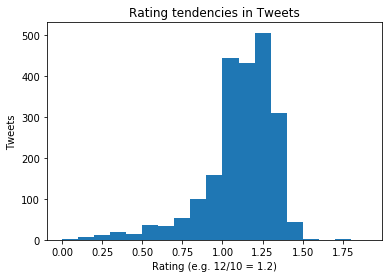

In [75]:
# Vast majority of ratings concentrate between 0 - 1.4, so let´s set bins as 0, 0.1 , 0.2 ... 1.4
rating_bins = [x / 10 for x in range(0, 20)]
#rating_counts.plot.hist('rating', bins=rating_bins)
data = tweets.rating
plt.hist(data, bins=rating_bins);
plt.xlabel("Rating (e.g. 12/10 = 1.2)");
plt.ylabel("Tweets");
plt.title("Rating tendencies in Tweets");

**Q2: How people tend to share media in their tweets?**

In [76]:
media_totals = media.groupby('type').count()
# We can appreciate that vast majority tend to use pictures, a little videos and very few gifs

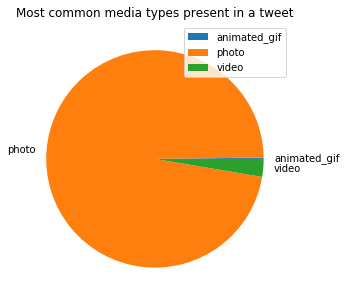

In [77]:
media_totals.plot.pie(y='tweet_id', figsize=(5,5));
plt.title("Most common media types present in a tweet");
plt.ylabel("");

**Q3: Can we see a pattern of correlation between favorite count and the fact is retweeted? How about between favorite count and given rating?**

In [78]:
tweets.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'dog_stage', 'rating'],
      dtype='object')

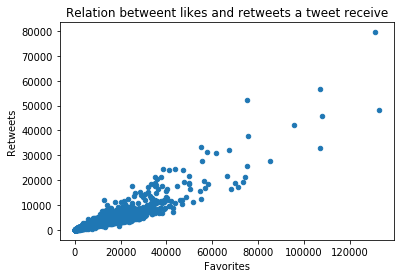

In [79]:
tweets.plot.scatter('favorite_count', 'retweet_count');
plt.title("Relation betweent likes and retweets a tweet receive");
plt.ylabel("Retweets");
plt.xlabel("Favorites");

Apparently, there is a tendency of retweet a favorited tweet.

In [80]:
tweets.rating.describe()

count    2174.000000
mean        1.223973
std         4.247681
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

From above description we can see there are clearly some outliers in our ratings as 75% of population is between 0 and 1.2, then suddently goes to a max value of 177.6
Let's limit ratings to take the ones betweet 0 - 10.

In [81]:
cutoff = len(tweets.rating.value_counts()) *1

In [82]:
no_outlier_ratings = tweets[tweets.rating <= 10.0]

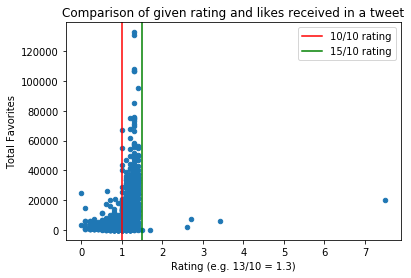

In [83]:
no_outlier_ratings.plot.scatter('rating', 'favorite_count');
plt.axvline(x=1.0, c='r', label="10/10 rating");
plt.axvline(x=1.5, c='g', label="15/10 rating");
plt.title("Comparison of given rating and likes received in a tweet")
plt.xlabel('Rating (e.g. 13/10 = 1.3)');
plt.ylabel('Total Favorites');
plt.legend();

From above graphic, looks like more famous tweets are associated with a rating betweet 10/10 and 15/10. For those outliers with not so common rating above 15/10, looks like are not impacted by a high favorite count

**Q4: What are the top 20 dog breeds appearing in WeRateDogs?**

In [84]:
# Lets consider only first tag as it is the one with highest probability and filter by dog
predictions = predictions[predictions.tag1_is_dog == True]
# then the top 20 breeds
top_breeds = predictions.tag1.value_counts()[:20]
top_breeds

golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
cocker_spaniel                30
malamute                      30
french_bulldog                26
miniature_pinscher            23
chesapeake_bay_retriever      23
siberian_husky                20
german_shepherd               20
staffordshire_bullterrier     20
cardigan                      19
shetland_sheepdog             18
beagle                        18
Name: tag1, dtype: int64

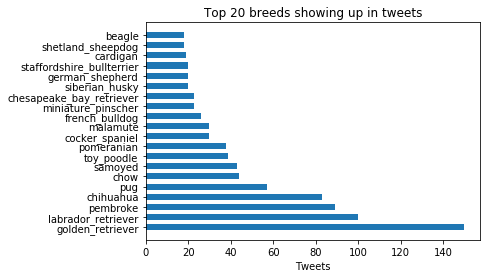

In [85]:
plt.barh(top_breeds.index, top_breeds.values, height=0.6, align='center');
plt.xlabel("Tweets");
plt.title("Top 20 breeds showing up in tweets");

**Q5: What are the most common tags for pets?**

In [86]:
dog_tags = tweets[tweets.dog_stage.notna()]

In [87]:
tag_count = dog_tags.dog_stage.value_counts()
tag_count

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

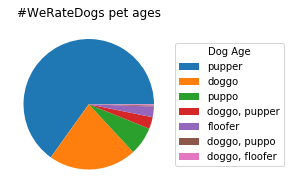

In [88]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = tag_count.values
stages = tag_count.index.to_list()


wedges, autotexts = ax.pie(data, textprops=dict(color="w"))

ax.legend(wedges, stages,
          title="Dog Age",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("#WeRateDogs pet ages")

plt.show()